In [276]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
%matplotlib inline

Пример уравнения и его аналитическое решение   

\begin{equation}
    y''+y = 1,    y(0) = 0,    y(\frac{\pi}{2}) = 0
\end{equation}

\begin{equation}
y=C_{1}\,\sin\left(x\right)+C_{2}\,\cos\left(x\right)+1
\end{equation}

\begin{equation}
C_{1} = - 1
\end{equation}
\begin{equation}
C_{2} = - 1
\end{equation}

\begin{equation}
y= -\sin\left(x\right) - \cos\left(x\right)+1
\end{equation}

\begin{equation}
y' = -\cos\left(x\right) + \sin\left(x\right)
\end{equation}

\begin{equation}
   \left(\frac{d^2}{dx^2}+1\right)y = 1
\end{equation}
\begin{equation}
   L = \frac{d^2}{dx^2}+1, f =1
\end{equation}

Слабая постановка задачи:

\begin{equation}
   \left(\int_0^{\pi/2}\left(\frac{d^2}{dx^2}+1\right)y - 1\right)vdx = 0
\end{equation}

\begin{equation}
   \left(\int_0^{\pi/2}\left(\frac{d^2}{dx^2}+1\right)y \right)vdx = \int_0^{\pi/2}vdx
\end{equation}

\begin{equation}
   \int_0^{\pi/2}\left(\frac{d^2y}{dx^2}+y\right) vdx = \int_0^{\pi/2}vdx
\end{equation}

\begin{equation}
   \int_0^{\pi/2}\left(\frac{d^2y}{dx^2}v+yv\right) dx = \int_0^{\pi/2}vdx
\end{equation}

\begin{equation}
   \int_0^{\pi/2}\left(y''v\right)dx +\int_0^{\pi/2}\left(yv\right) dx = \int_0^{\pi/2}vdx
\end{equation}

Первый терм распишем по частям

\begin{equation}
   \int_0^{\pi/2}\left(y''v\right)dx = \int_0^{\pi/2}\left((y')'v\right)dx = y'v\bigg|_0^{\pi/2}-  \int_0^{\pi/2}\left(y'v'\right)dx 
\end{equation}

Из условия что v - любая пробная функция
\begin{equation}
y'v\bigg|_0^{\pi/2} = 0
\end{equation}

\begin{equation}
   \int_0^{\pi/2}\left(y''v\right)dx =  -\int_0^{\pi/2}\left(y'v'\right)dx 
\end{equation}

\begin{equation}
   -\int_0^{\pi/2}\left(y'v'\right)dx  +\int_0^{\pi/2}\left(yv\right) dx = \int_0^{\pi/2}vdx
\end{equation}

билинейная форма
\begin{equation}
    a(y,v)=\int_0^{\pi/2}\left(-\left(y'v'\right)+yv\right) dx 
\end{equation}


\begin{equation}
   (f,v) = \int_0^{\pi/2}vdx
\end{equation}

Базисные функции в МКЭ    

\begin{equation*}
\psi_i(x) = 
 \begin{cases}
   \frac{x-x_{i-1}}{h} &\text{, $x\in[x_{i-1},x_i]$}
   \\
   \frac{x_{i+1}-x}{h}  &\text{, $x\in[x_i,x_{i+1}]$}
   \\
   0 &\text{, $x\notin[x_i,x_{i+1}]$}
 \end{cases}
\end{equation*}

Решение задачи в виде линейной комбинации базисных функций

Функции линейно независимы и образуют базис в пространстве Соболева

\begin{equation}
y(x) = \sum_{i=0}^N a_i \phi_i(x)
\end{equation}

Согласно методу Ритца

\begin{equation}
Ay = f
\end{equation}
Решение задачи - это, поиск минимума следующего функционала:
\begin{equation}
\Phi(x) = (Ay,y) - 2(f,y)
\end{equation}

\begin{equation}
\Phi(x) = (A\sum_{i=0}^N a_i \phi_i(x),\sum_{j=0}^N a_j \phi_j(x)) - 2(f,\sum_{i=0}^N a_i \phi_i(x))
\end{equation}

\begin{equation}
\Phi(x) = (A\sum_{i=0}^N a_i \phi_i(x),\sum_{j=0}^N a_j \phi_j(x)) - 2\sum_{i=0}^N a_i (f,\phi_i(x))
\end{equation}

\begin{equation}
\Phi(x) = \sum_{i=0}^N \sum_{j=0}^N a_i  a_j(A \phi_i(x), \phi_j(x)) - 2\sum_{i=0}^N a_i (f,\phi_i(x))
\end{equation}

Необходимые условия минимума

\begin{equation}
\frac{\partial\Phi(x)}{\partial a_i} = 2\sum_{j=0}^N a_j(A \phi_i(x), \phi_j(x)) - 2(f,\phi_i(x)) = 0
\end{equation}

Откуда получаем СЛАУ:
\begin{equation}
\sum_{j=0}^N a_j(A \phi_i(x), \phi_j(x)) = (f,\phi_i(x))
\end{equation}
\begin{equation}
i = 0..N
\end{equation}

\begin{equation}
    (A \phi_i(x), \phi_j(x)) = \int_0^{\pi/2}\left(-\phi_i(x)'\phi_j(x)'+\phi_i(x)\phi_j(x)\right) dx 
\end{equation}

\begin{equation}
    (f,\phi_i(x)) = \int_0^{\pi/2}\left(f\phi_i(x)\right) dx 
\end{equation}

In [277]:
N = 8
x = np.linspace(0,np.pi/2, N)
dx = x[1]-x[0]
h = dx
y = -np.sin(x) - np.cos(x) + 1

Определение базисной функции конечного одномерного элемента, замечательное свойство что такие функции почти всюду ортогональны и образуют 3х диагональную матрицу при решении соответствующей СЛАУ  

In [301]:
def psi(x_i, x, i, N, h):
    """x - array, i - num of x and function psi_i(x_i), пробная(базисная) функция"""
    if i == 0:
        if x_i >= x[i] and x_i <= x[i+1]:
            return (x[i+1] - x_i) / h
        elif x_i >= x[i+1]:
            return 0
        
    elif i == N:
        if x_i >= x[i-1] and x_i <= x[N]:
            return (x_i - x[N-1]) / h
        else:
            return 0
    else:        
        if x_i <= x[i-1]:
            return 0
        elif x_i >= x[i-1] and x_i <= x[i]:
            return (x_i - x[i-1]) / h
        elif x_i >= x[i] and x_i <= x[i+1]:
            return (x[i+1] - x_i) / h
        else:
            return 0
    


Определение функционала правой части

In [302]:
def right_part(i,f,h,N,x):
    psi_i = np.zeros((N))
    for n in range(0,N):
        psi_i[n] = psi(x[n], x, i, N, h)
    return sum(psi_i*f)*h

Определение функционала билинейной формы

In [303]:
def bilinform(i,j,x,h,N):
    psi_i = np.zeros((N))
    psi_j = np.zeros((N))
    diff_psi_i = np.zeros((N))
    diff_psi_j = np.zeros((N))
    for n in range(0,N):
        psi_i[n] = psi(x[n], x, i, N, h)
        # print(psi(x[n], x, i, N, h))
        psi_j[n] = psi(x[n], x, j, N, h)
    diff_psi_i[1:] = np.diff(psi_i)/h
    diff_psi_j[1:] = np.diff(psi_j)/h
    # print(psi_j)
    return sum(-(diff_psi_i*diff_psi_j) + psi_i*psi_j)*h

вычисления соответствующих функционалов

In [304]:
BFM = np.zeros((N,N))
rp = np.zeros((N))
for i in range(0, N):
    rp[i] = right_part(i,1,h,N,x)
    for j in range(0, N):
        BFM[i,j] = bilinform(i,j,x,h,N)
               

обозначение краевых условия в базисных функциях $a_0 = a_N = 0$

In [305]:
rp[0] = 0
rp[-1] = 0

In [306]:
BFM[0,1] = 0
BFM[1,0] = 0
BFM[N-2,N-1] = 0
BFM[N-1,N-2] = 0

Графическое отображение элементов разряженной матрицы коэффициентов СЛАУ 

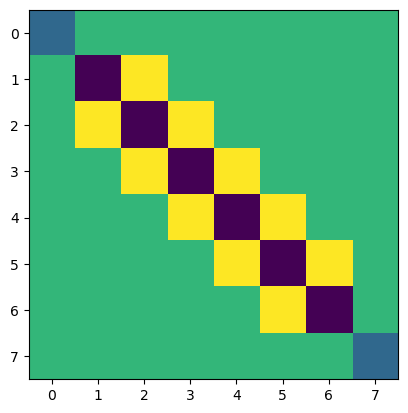

In [308]:
plt.imshow(BFM)

Решение СЛАУ и вычисления коэффициентов разложения 

In [309]:
a_y = np.linalg.solve(BFM, rp)

In [320]:
psi_vec = np.zeros((N,N))
y_numeric = np.zeros((N))

for i in range(0, N):
    for n in range(0,N):
        psi_vec[i,n] = psi(x[i], x, n, N, h)

График базисных функций, соответствующих решению 

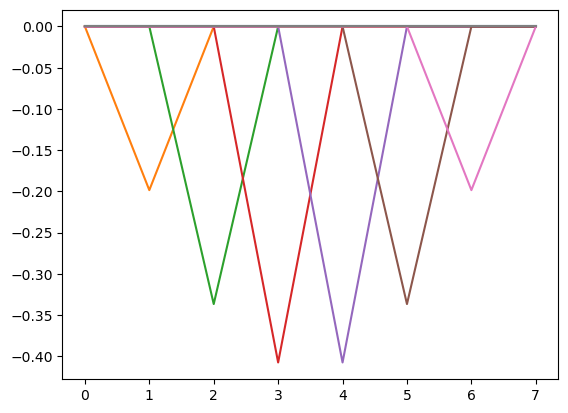

In [321]:
plt.plot(a_y[:]*psi_vec[:,:])

Вычисление приближенного решения через линейную комбинацию базисных функций и вычисленных коэффициентов разложения      

In [322]:
for i in range(0, N):
    y_numeric[:] = y_numeric[:] + a_y[i] * psi_vec[i,:]

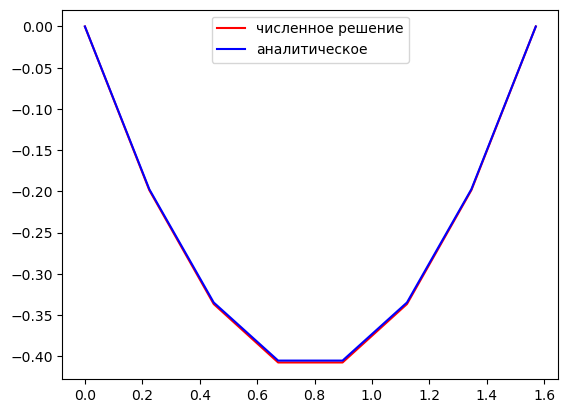

In [323]:
plt.plot(x, y_numeric, 'r', label='численное решение')
plt.plot(x, y, 'b', label='аналитическое')
plt.legend()

Невязка 

In [324]:
y[4] - y_numeric[4]

0.00229721314834902

In [325]:
h**4

0.002535638562942587